In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # For data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [81]:
dfclubnames = pd.read_csv('../input/ClubNames.csv')
dffulldata = pd.read_csv('../input/FullData.csv')
dfnationalnames = pd.read_csv('../input/NationalNames.csv')
dfplayernames = pd.read_csv('../input/PlayerNames.csv')

>**1-For onfield behaviour**

    For Onfield Behaviour I am considering following features:

    Attribute       Expected behaviour
    
    Aggression          Less
    Reaction            Less
    Interception        Less
    Composure           More
    Vision              More

    First Normalizing each of the columns specified above
    so as use all of them for Comparision

In [82]:
Feature_set = ['Agility', 'Reactions', 'Interceptions', 'Composure', 'Vision']

In [83]:
for features in Feature_set:
    dffulldata[features] = (dffulldata[features] - dffulldata[features].mean()) / (max(dffulldata[features]) - min(dffulldata[features]))


In [84]:
dffulldata[['Name', 'Aggression', 'Reactions', 'Interceptions', 'Composure', 'Vision']].head()

,Name,Aggression,Reactions,Interceptions,Composure,Vision
0,Cristiano Ronaldo,63,0.510887,-0.197712,0.338729,0.384430
1,Lionel Messi,48,0.495961,-0.275490,0.428616,0.443954
2,Neymar,56,0.391484,-0.119934,0.271313,0.324906
3,Luis Suárez,78,0.466111,-0.064378,0.305021,0.372525
4,Manuel Neuer,29,0.346708,-0.186601,0.158953,0.205859


In [85]:
dffulldata['Onfield_behaviour'] = (-dffulldata['Aggression'] - dffulldata ['Reactions'] - dffulldata['Interceptions']
+dffulldata['Composure'] + dffulldata['Vision']) / 5.0;

In [86]:
dffulldata[['Name', 'Onfield_behaviour']].head(10)

,Name,Onfield_behaviour
0,Cristiano Ronaldo,-12.518003
1,Lionel Messi,-9.469580
2,Neymar,-11.135066
3,Luis Suárez,-15.544837
4,Manuel Neuer,-5.759059
5,De Gea,-7.595248
6,Robert Lewandowski,-15.930764
7,Gareth Bale,-12.974337
8,Zlatan Ibrahimović,-16.658693
9,Thibaut Courtois,-4.616140


In [87]:
#Find the Index of best Onfield-behaviour player

Best_Index = np.argmax(dffulldata['Onfield_behaviour'])
Best_Index

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


6145

In [88]:
#Best Onfield score

dffulldata['Onfield_behaviour'][Best_Index]

-0.47280494647204457

In [89]:
#Display the best player

dffulldata.loc[[Best_Index]]

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Onfield_behaviour
6145,Matej Delač,Croatia,NaN,NaN,Royal Mouscron,GK,21.0,09/01/2010,2018.0,69,...,15,17,19,12,64,71,64,67,73,-0.472805


* >**Analytics On Average, Minimum, Maximum Age of Players in different country**

In [90]:
dffulldata.groupby('Nationality').Age.agg(['mean', 'max', 'min']).head()

,mean,max,min
Nationality,,,
Afghanistan,19.500000,20,19
Albania,24.297297,31,18
Algeria,26.840000,34,19
Angola,26.272727,34,20
Antigua & Barbuda,26.500000,30,21


* >**Analytics on what attributes the different club prefers**

In [91]:
dffulldata = pd.read_csv('../input/FullData.csv')

In [92]:
Feature_set = [ 'Ball_Control', 'Dribbling', 'Crossing','Short_Pass',
              'Long_Pass', 'Acceleration', 'Speed','Stamina', 'Strength','Agility'
               , 'Shot_Power', 'Finishing', 'Long_Shots']

In [93]:
'''Normalizing the data on the Above attributes'''

for features in Feature_set:
    dffulldata[features] = (dffulldata[features] - dffulldata[features].mean()) / (max(dffulldata[features]) - min(dffulldata[features]))

In [94]:
'''Displaying all the normalized Attributes'''
dffulldata[Feature_set].head(3)

,Ball_Control,Dribbling,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Agility,Shot_Power,Finishing,Long_Shots
0,0.389191,0.399969,0.403046,0.303417,0.286092,0.302496,0.311955,0.335566,0.191207,0.315215,0.404653,0.514434,0.489619
1,0.411414,0.453733,0.320693,0.364393,0.402371,0.314260,0.253131,0.123801,-0.078024,0.315215,0.326876,0.535940,0.466630
2,0.411414,0.442980,0.297164,0.279027,0.262836,0.326025,0.288425,0.182625,-0.206229,0.385803,0.249098,0.471424,0.340193


In [95]:
Club_Feature = (dffulldata.groupby(['Club'])[Feature_set].mean())
Club_Feature.head(3)

,Ball_Control,Dribbling,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Agility,Shot_Power,Finishing,Long_Shots
Club,,,,,,,,,,,,,
1. FC Heidenheim,-0.027253,-0.032289,-0.044954,-0.023900,-0.063675,-0.024563,-0.006163,-0.009375,0.008130,0.018744,0.008209,-0.020619,-0.028082
1. FC Köln,0.040474,0.036859,0.038340,0.057638,0.048167,-0.011531,0.003357,-0.000181,0.050674,0.013405,0.073457,0.033872,0.034712
1. FC Nürnberg,0.011811,0.008264,0.042122,-0.005381,0.007022,-0.008849,0.011955,-0.033342,0.052471,-0.016298,-0.005267,-0.028960,-0.005866


In [96]:
Club_Feature.columns

Index(['Ball_Control', 'Dribbling', 'Crossing', 'Short_Pass', 'Long_Pass',
       'Acceleration', 'Speed', 'Stamina', 'Strength', 'Agility', 'Shot_Power',
       'Finishing', 'Long_Shots'],
      dtype='object')

In [97]:
'''Finding the number of rows'''
num_rows = Club_Feature.shape[0]

>Checkpoint

In [98]:
'''Club_Wise_Feature is a dictionary that stores the the best feature Club-wise'''

Club_Wise_Feature = {}

Club_names = list(dfclubnames['Name'])
for clubs in Club_names[0:100]:
    Club_Wise_Feature[clubs] = np.argmax(Club_Feature.loc[clubs, :])
Club_Wise_Feature

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


{'1. FC Köln': 'Shot_Power',
 '1. FSV Mainz 05': 'Dribbling',
 '1899 Hoffenheim': 'Shot_Power',
 'AS Monaco': 'Short_Pass',
 'AS Saint-Étienne': 'Crossing',
 'Ajax': 'Ball_Control',
 'Arsenal': 'Short_Pass',
 'Atalanta': 'Shot_Power',
 'Athletic Bilbao': 'Long_Pass',
 'Atlético Madrid': 'Short_Pass',
 'Bayer 04': 'Short_Pass',
 'Beşiktaş': 'Shot_Power',
 'Bologna': 'Long_Pass',
 'Bor. Dortmund': 'Short_Pass',
 "Bor. M'gladbach": 'Short_Pass',
 'Bournemouth': 'Acceleration',
 'CD Leganés': 'Short_Pass',
 'CSKA Moscow': 'Long_Shots',
 'Celta Vigo': 'Short_Pass',
 'Chelsea': 'Ball_Control',
 'Chievo Verona': 'Shot_Power',
 'Club Brugge': 'Long_Pass',
 'Crystal Palace': 'Crossing',
 'Deport. Alavés': 'Ball_Control',
 'Eint. Frankfurt': 'Ball_Control',
 'Everton': 'Dribbling',
 'FC Augsburg': 'Shot_Power',
 'FC Barcelona': 'Short_Pass',
 'FC Basel': 'Strength',
 'FC Bayern': 'Long_Pass',
 'FC Krasnodar': 'Long_Shots',
 'FC Porto': 'Dribbling',
 'FC Schalke 04': 'Crossing',
 'Fenerbahçe': 'L

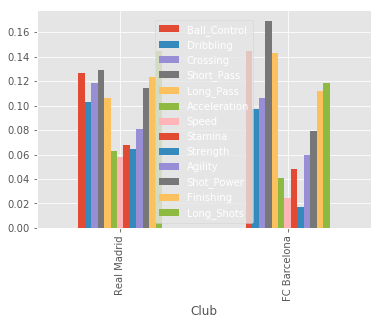

In [131]:
%matplotlib inline
plt.style.use('ggplot')
Club_Feature.loc[['Real Madrid', 'FC Barcelona']].plot(kind = 'bar')
plt.show()

* >**Analytics on the Contract-Period :- Most Loyal Player of a club**

In [100]:
dffulldata = pd.read_csv('../input/FullData.csv')

In [101]:
'''Converting the Club_Joining Attribute to standard date_time format of pandas
And Extracting the Year from Club_Joining Attribute'''

dffulldata['Club_Joining'] = pd.to_datetime(dffulldata.Club_Joining)
dffulldata['Contract_Year'] = dffulldata.Club_Joining.dt.year
dffulldata['Contract_Validity'] = dffulldata['Contract_Expiry'] - dffulldata['Contract_Year']

In [102]:
'''Max_Contract_Period is a dataframe contain Player in a Club having max Contract_Period'''

Max_Contract_Period = dffulldata.groupby('Club')['Contract_Validity', 'Name'].max()
Max_Contract_Period.head()

,Contract_Validity,Name
Club,,
1. FC Heidenheim,12.0,Vitus Eicher
1. FC Köln,12.0,Yūya Ōsako
1. FC Nürnberg,9.0,Willi Evseev
1. FSV Mainz 05,11.0,Yoshinori Mutō
1860 München,8.0,Victor Andrade


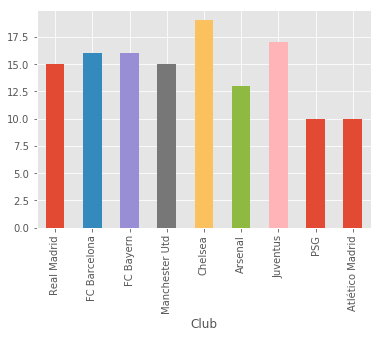

In [127]:
'''Plotting the Max_Contract_Period for Top_Clubs'''

plt.style.use('ggplot')
Top_Clubs = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd', 'Chelsea',
            'Arsenal', 'Juventus', 'PSG', 'Atlético Madrid']
Max_Contract_Period['Contract_Validity'].loc[Top_Clubs].plot(kind = 'bar')

* >**Analytics on GoalKeepers**

In [104]:
dffulldata = pd.read_csv('../input/FullData.csv') 

In [105]:
GoalKeeper_attri = ['GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes']

In [106]:
'''Normalizing the data on the Above attributes'''

for features in GoalKeeper_attri:
    dffulldata[features] = (dffulldata[features] - dffulldata[features].mean()) / (max(dffulldata[features]) - min(dffulldata[features]))

In [107]:
dffulldata.head(10)
dffulldata['Average_GKSkill'] = np.zeros(dffulldata.shape[0])
for index in range(dffulldata.shape[0]):
    dffulldata['Average_GKSkill'] += (dffulldata[ 'GK_Positioning'] + dffulldata['GK_Diving'] + 
                                             dffulldata['GK_Kicking'] + dffulldata['GK_Handling']
                                             + dffulldata['GK_Reflexes']) / 5.0;
dffulldata['Average_GKSkill'] = dffulldata[GoalKeeper_attri] / len(GoalKeeper_attri)

In [108]:
dffulldata['Average_GKSkill'][0:10]

0   -0.005799
1   -0.005799
2   -0.003577
3    0.036423
4    0.165312
5    0.154201
6   -0.019132
7   -0.025799
8   -0.016910
9    0.154201
Name: Average_GKSkill, dtype: float64

In [109]:
ClubWise_GK = dffulldata.groupby(['Club'])['Name', 'Club', 'Average_GKSkill'].max()
ClubWise_GK.head()

,Name,Club,Average_GKSkill
Club,,,
1. FC Heidenheim,Vitus Eicher,1. FC Heidenheim,0.114201
1. FC Köln,Yūya Ōsako,1. FC Köln,0.145312
1. FC Nürnberg,Willi Evseev,1. FC Nürnberg,0.125312
1. FSV Mainz 05,Yoshinori Mutō,1. FSV Mainz 05,0.127534
1860 München,Victor Andrade,1860 München,0.114201


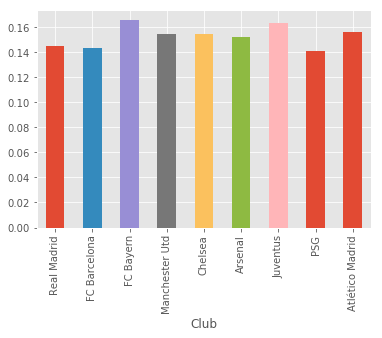

In [126]:
plt.style.use('ggplot')
ClubWise_GK['Average_GKSkill'].loc[Top_Clubs].plot(kind = 'bar')

In [111]:
'''Find the Club having best Goal Keeper'''
dffulldata.loc[np.argmax(dffulldata['Average_GKSkill']),['Name', 'Nationality', 'Club']]

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Name           Manuel Neuer
Nationality         Germany
Club              FC Bayern
Name: 4, dtype: object

* >**Analytics on the best Goal**

In [112]:
'''Reimporting the FullData.csv'''

dffulldata = pd.read_csv("../input/FullData.csv")

In [113]:
Goal_Feature_vector = ['Shot_Power','Heading', 'Volleys', 'Penalties','Finishing', 'Ball_Control', 'Dribbling', 'Short_Pass', 'Freekick_Accuracy']

In [114]:
dffulldata[Goal_Feature_vector].head()

,Shot_Power,Heading,Volleys,Penalties,Finishing,Ball_Control,Dribbling,Short_Pass,Freekick_Accuracy
0,92,85,88,85,93,93,92,83,76
1,85,71,85,74,95,95,97,88,90
2,78,62,83,81,89,95,96,81,84
3,87,77,88,85,94,91,86,83,84
4,25,25,11,47,13,48,30,55,11


In [115]:
'''Normailze the above Features'''

for features in Goal_Feature_vector:
    dffulldata[features] = (dffulldata[features] - dffulldata[features].mean()) / (max(dffulldata[features]) - min(dffulldata[features]))

In [116]:
dffulldata[Goal_Feature_vector].head()

,Shot_Power,Heading,Volleys,Penalties,Finishing,Ball_Control,Dribbling,Short_Pass,Freekick_Accuracy
0,0.404653,0.362299,0.496938,0.402632,0.514434,0.389191,0.399969,0.303417,0.366478
1,0.326876,0.206743,0.463605,0.279037,0.535940,0.411414,0.453733,0.364393,0.523782
2,0.249098,0.106743,0.441382,0.357688,0.471424,0.411414,0.442980,0.279027,0.456366
3,0.349098,0.273410,0.496938,0.402632,0.525187,0.366969,0.335453,0.303417,0.456366
4,-0.339791,-0.304368,-0.358618,-0.024334,-0.345781,-0.110809,-0.266698,-0.038046,-0.363859


In [118]:
'''Take mean of the above attributes as the "Goal_Score" Attribute'''

dffulldata['Goal_Score'] = np.zeros(dffulldata.shape[0])
for features in Goal_Feature_vector:
    dffulldata['Goal_Score'] += (dffulldata[features]) / float(len(Goal_Feature_vector))


In [124]:
'''Best Player according to the Goal_Score'''

Best_Index = np.argmax(dffulldata['Goal_Score'])
dffulldata.loc[Best_Index, ['Name', 'Nationality', 'Club']]

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Name           Zlatan Ibrahimović
Nationality                Sweden
Club               Manchester Utd
Name: 8, dtype: object